In [2]:
import pyshark
from pathlib import Path
from tqdm import tqdm

import nest_asyncio
nest_asyncio.apply()

ROOT = Path.cwd().parent

In [3]:
import utils
import matplotlib.pyplot as plt
import plot
import numpy as np
import classifier
from astropy.timeseries import LombScargle
from scipy.signal import find_peaks

In [4]:
def plot_lomb(data):
    t = data['sec']
    seq_diff = data['value']
    frequency, power = LombScargle(t, seq_diff).autopower(maximum_frequency=5.0)
    l = []
    num = 3
    # peaks,_ = find_peaks(power,prominence=0.1)
    peaks,_ = find_peaks(power)
    peaks = peaks[np.argsort(power[peaks])[::-1][:num]]
    if len(peaks) != 0:
        for i in range(num):
            l.append(power[peaks[i]])
            l.append(frequency[peaks[i]])
        plt.scatter(frequency[peaks], power[peaks], color='red')

    # plt.title(str(path.parent.name)[:-10])
    # plt.title(str(path.parent.name)[:-7])
    plt.xlabel('frequency[Hz]')
    plt.ylabel('amplitude[s]')
    plt.subplots_adjust(left=0.15, bottom=0.15)
    plt.plot(frequency, power)

In [5]:
cong_name = Path('/home/murayama/Document/ns3/ns-3-allinone/ns-3.30/data/TCP_Congestion_0_range10/TCP_Congestion_0_range10-flw0-seq_diff.data')
normal_name = Path('/home/murayama/Document/ns3/ns-3-allinone/ns-3.30/data/Normal_0_range10/Normal_0_range10-flw0-seq_diff.data')
error_name = Path('/home/murayama/Document/ns3/ns-3-allinone/ns-3.30/data/Link_Error_0_range10/Link_Error_0_range10-flw0-seq_diff.data')

In [6]:
print(cong_name.exists(), normal_name.exists(), error_name.exists())

True True True


normal
cong
error


/home/murayama/.local/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/murayama/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/murayama/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


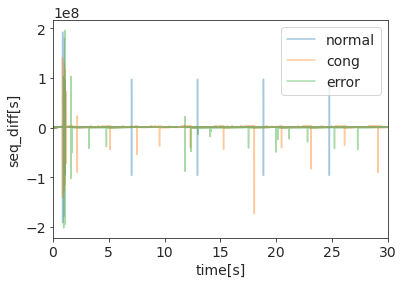

In [7]:
duration = 30
normal_data = utils.read_data(normal_name, duration)
cong_data = utils.read_data(cong_name, duration)
error_data = utils.read_data(error_name, duration)
data_list = [normal_data, cong_data, error_data]

label_list = ['normal', 'cong', 'error']

para = 'seq_diff'
for d, label in zip(data_list, label_list):
    print(label)
    utils.plot_metric(d, 30, para, None, 1, True, label)

log_data_list = []
for d in data_list:
    d['value'] = np.log(d['value'])
    log_data_list.append(d)

normal
cong
error


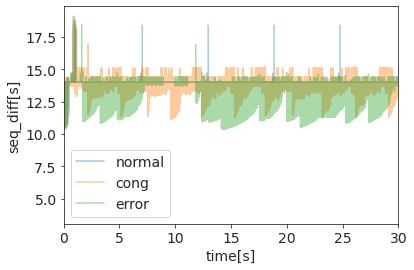

In [8]:
para = 'seq_diff'
for d, label in zip(log_data_list, label_list):
    print(label)
    utils.plot_metric(d, 30, para, None, 1, True, label)

# plt.clf()
# plot_lomb(log_data_list[0])

/home/murayama/.local/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/murayama/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/murayama/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


normal
cong
error


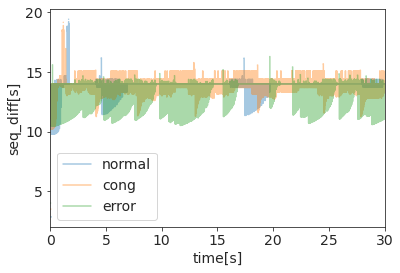

In [9]:
range_val = 50
cong_name = Path(f'/home/murayama/Document/ns3/ns-3-allinone/ns-3.30/data/TCP_Congestion_0_range{range_val}/TCP_Congestion_0_range{range_val}-flw0-seq_diff.data')
normal_name = Path(f'/home/murayama/Document/ns3/ns-3-allinone/ns-3.30/data/Normal_0_range{range_val}/Normal_0_range{range_val}-flw0-seq_diff.data')
error_name = Path(f'/home/murayama/Document/ns3/ns-3-allinone/ns-3.30/data/Link_Error_0_range{range_val}/Link_Error_0_range{range_val}-flw0-seq_diff.data')

duration = 30
normal_data = utils.read_data(normal_name, duration)
cong_data = utils.read_data(cong_name, duration)
error_data = utils.read_data(error_name, duration)
data_list = [normal_data, cong_data, error_data]

label_list = ['normal', 'cong', 'error']

log_data_list = []
for d in data_list:
    d['value'] = np.log(d['value'])
    log_data_list.append(d)

para = 'seq_diff'
for d, label in zip(log_data_list, label_list):
    print(label)
    utils.plot_metric(d, 30, para, None, 1, True, label)

/home/murayama/.local/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


normal
cong
error


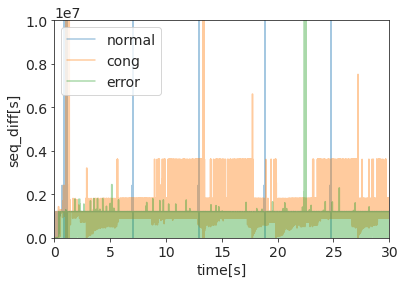

In [10]:
range_val = 100
cong_name = Path(f'/home/murayama/Document/ns3/ns-3-allinone/ns-3.30/data/TCP_Congestion_0_range{range_val}/TCP_Congestion_0_range{range_val}-flw0-seq_diff.data')
normal_name = Path(f'/home/murayama/Document/ns3/ns-3-allinone/ns-3.30/data/Normal_0_range{range_val}/Normal_0_range{range_val}-flw0-seq_diff.data')
error_name = Path(f'/home/murayama/Document/ns3/ns-3-allinone/ns-3.30/data/Link_Error_0_range{range_val}/Link_Error_0_range{range_val}-flw0-seq_diff.data')

duration = 30
normal_data = utils.read_data(normal_name, duration)
cong_data = utils.read_data(cong_name, duration)
error_data = utils.read_data(error_name, duration)
data_list = [normal_data, cong_data, error_data]

label_list = ['normal', 'cong', 'error']

# log_data_list = []
# for d in data_list:
#     d['value'] = np.log(d['value'])
#     log_data_list.append(d)

para = 'seq_diff'
for d, label in zip(data_list, label_list):
    print(label)
    # utils.plot_metric(d, 30, para, None, 1, True, label)
    utils.plot_metric(d, 30, para, 1e7, 1, True, label)

normal
cong


/home/murayama/.local/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


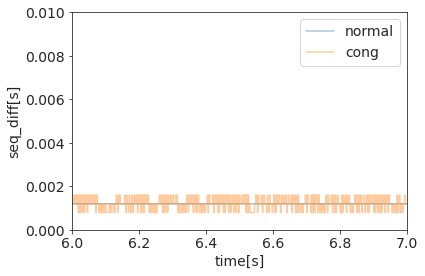

In [11]:
range_val = 100
cong_name = Path(f'/home/murayama/Document/ns3/ns-3-allinone/ns-3.30/data/TCP_Congestion_0_range{range_val}/TCP_Congestion_0_range{range_val}-flw0-delta_send.data')
normal_name = Path(f'/home/murayama/Document/ns3/ns-3-allinone/ns-3.30/data/Normal_0_range{range_val}/Normal_0_range{range_val}-flw0-delta_send.data')
error_name = Path(f'/home/murayama/Document/ns3/ns-3-allinone/ns-3.30/data/Link_Error_0_range{range_val}/Link_Error_0_range{range_val}-flw0-delta_send.data')

duration = 30
normal_data = utils.read_data(normal_name, duration)
cong_data = utils.read_data(cong_name, duration)
error_data = utils.read_data(error_name, duration)
data_list = [normal_data, cong_data, error_data]

label_list = ['normal', 'cong']

# log_data_list = []
# for d in data_list:
#     d['value'] = np.log(d['value'])
#     log_data_list.append(d)

para = 'seq_diff'
for d, label in zip(data_list, label_list):
    print(label)
    # utils.plot_metric(d, 30, para, None, 1, True, label)
    utils.plot_metric(d, [6,7], para, 0.01, 1, True, label)

/home/murayama/.local/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


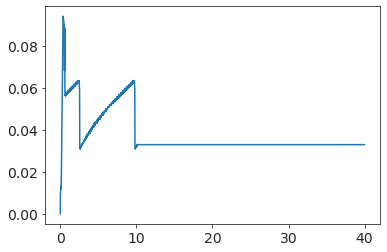

In [26]:
rtt = utils.read_data(str(ROOT / 'data' / 'bulk_send_test-flw-rtt.data'), 40)
plt.plot(rtt['sec'], rtt['value'])

/home/murayama/.local/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


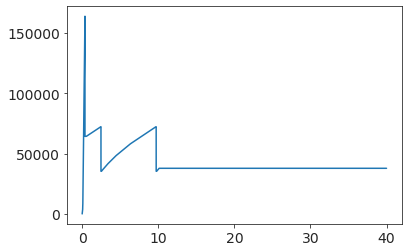

In [27]:
cwnd = utils.read_data(str(ROOT / 'data' / 'bulk_send_tes-flw-cwnd.data'), 40)
plt.plot(cwnd['sec'], cwnd['value'])

/home/murayama/.local/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


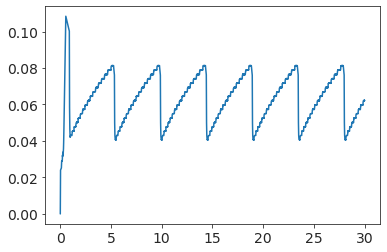

In [28]:
name = 'sawtooth'
file_path = str(ROOT / 'data' / name / f'{name}-flw0-rtt.data')
rtt = utils.read_data(file_path, 30)
plt.plot(rtt['sec'], rtt['value'])

/home/murayama/.local/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


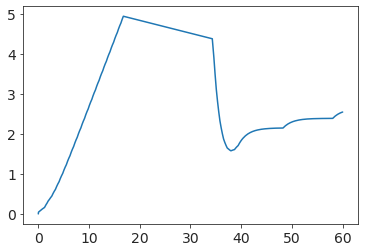

In [52]:
name = 'sawtooth'
file_path = str(ROOT / 'data' / name / f'{name}-flw0-rtt.data')
rtt = utils.read_data(file_path, 300)
plt.plot(rtt['sec'], rtt['value'])